In [121]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipeline

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
#Read data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_cardiovascular_risk.csv')

In [124]:
#Check first five rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [125]:
df.shape

(3390, 17)

In [126]:
#Check DataFrame's index, column data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [127]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [128]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [129]:
# Remove null values from specific columns
df.dropna(subset=['education', 'cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose'], inplace=True)


In [130]:
#again check null Values
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [131]:
#check duplictate
df.duplicated().sum()

0

# EDA

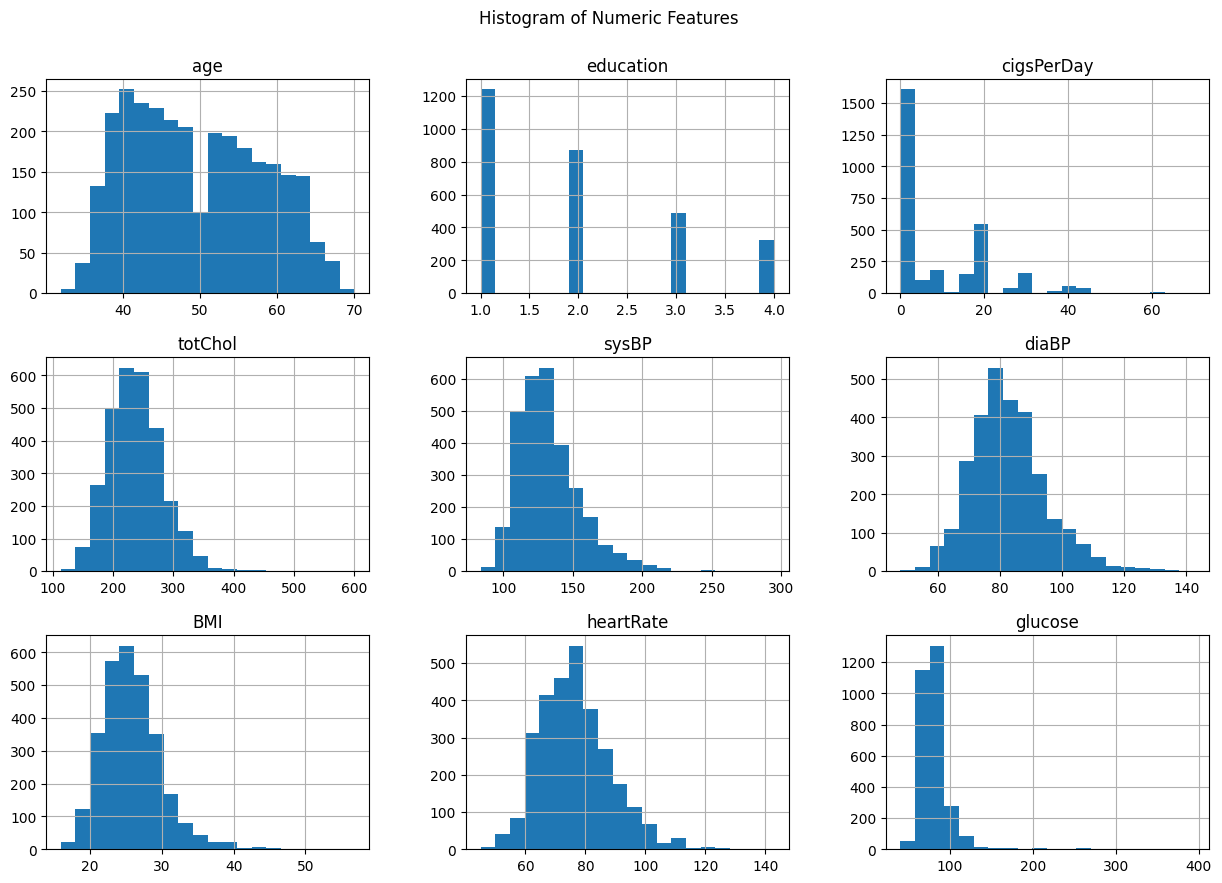

In [132]:
# Histogram for numeric features
numeric_features = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numeric Features', y=0.95)
plt.show()

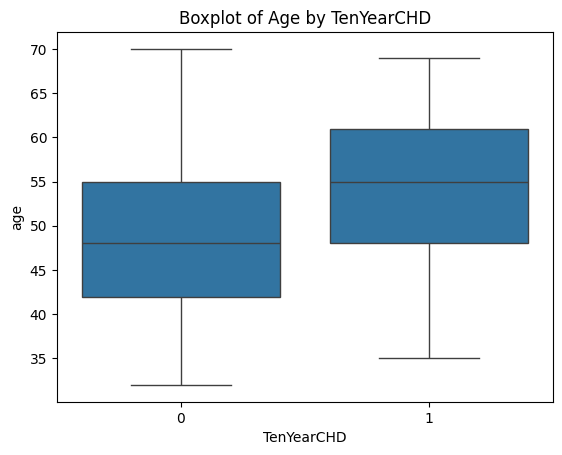

In [133]:
# Boxplot for target variable
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Boxplot of Age by TenYearCHD')
plt.show()


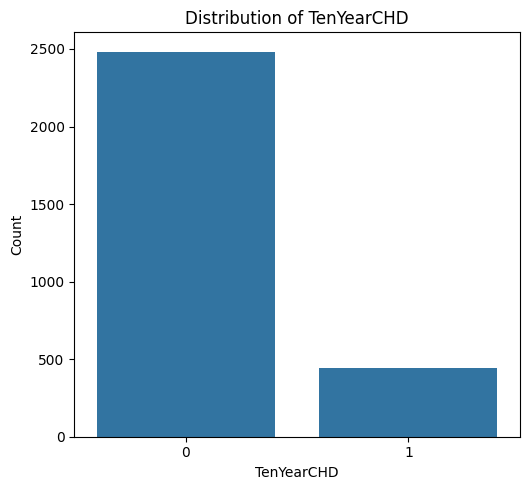

In [134]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='TenYearCHD', data=df)
plt.title('Distribution of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

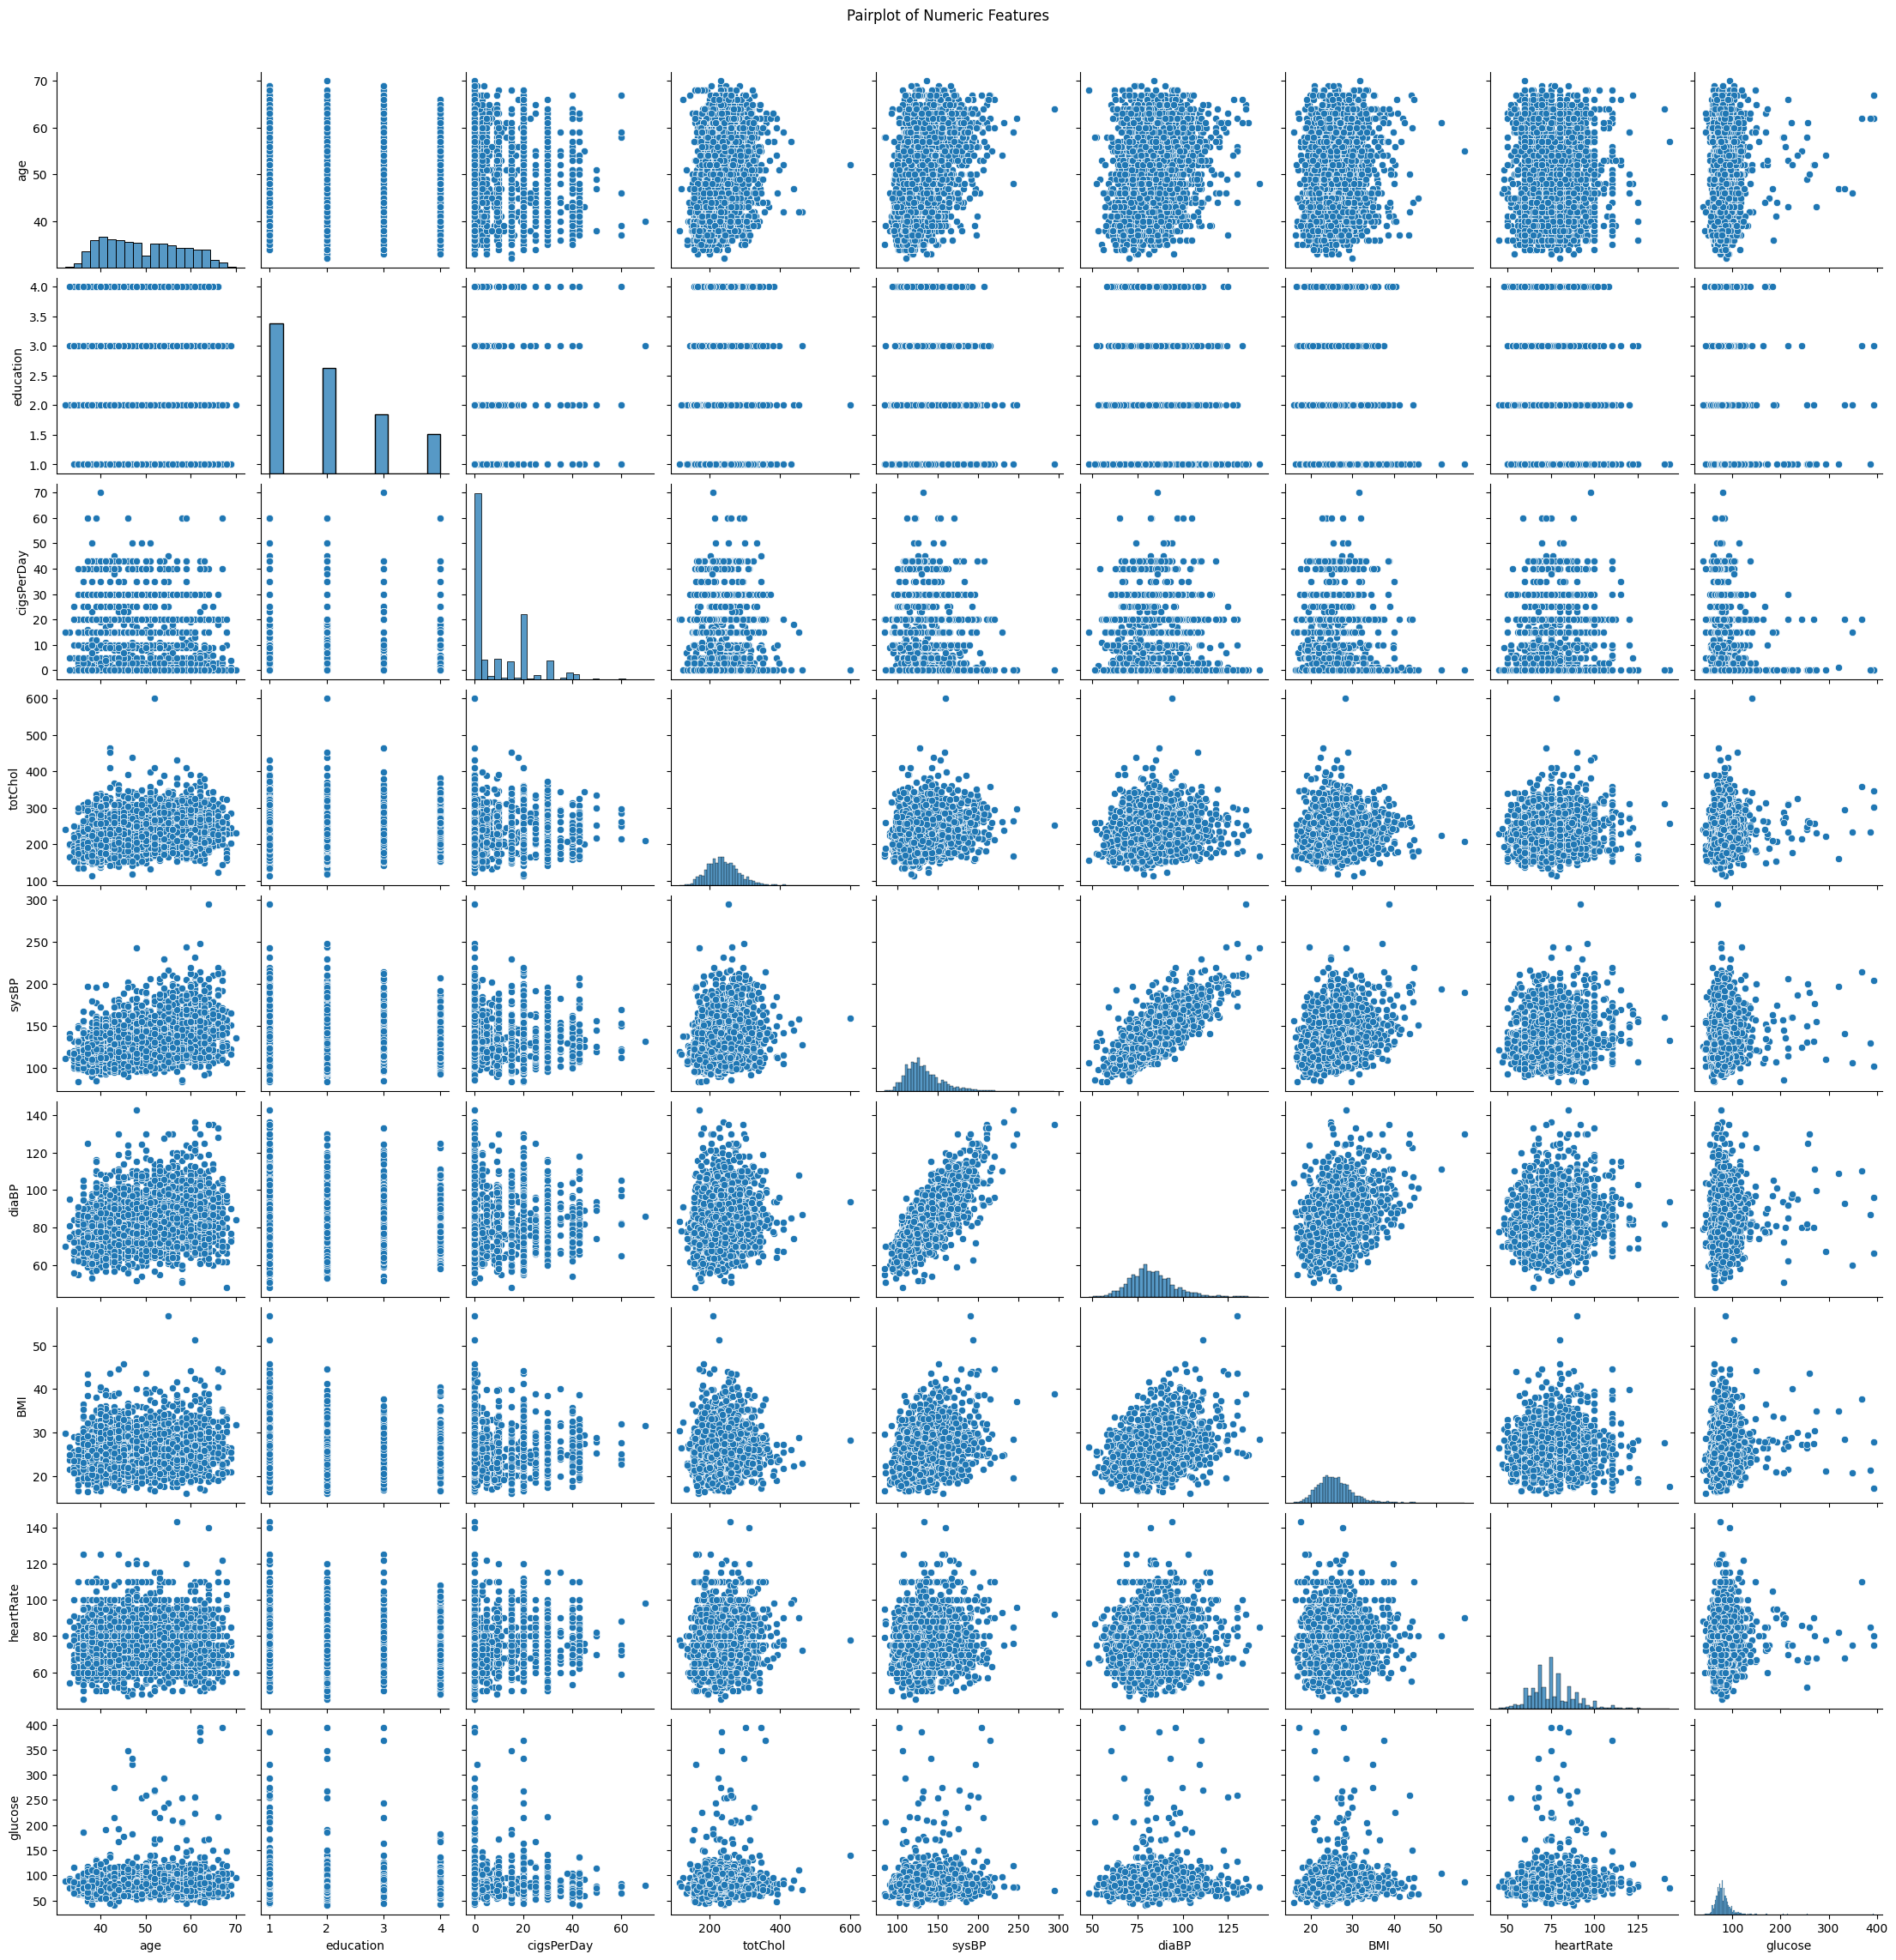

In [135]:
# Pairplot for numeric features
numeric_features = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
sns.pairplot(df[numeric_features])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

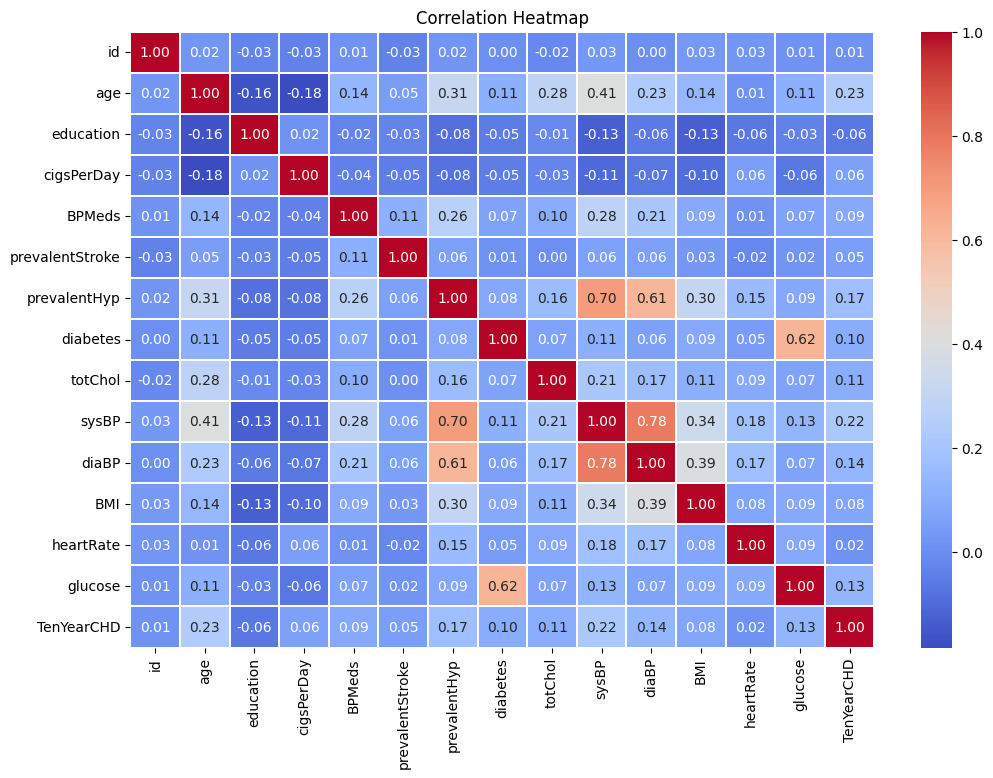

In [136]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Frequency')

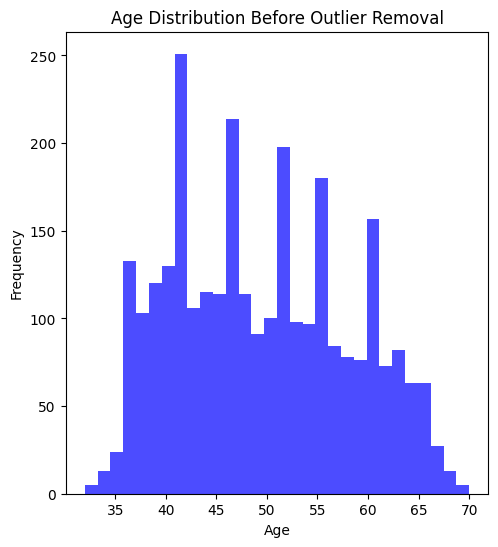

In [137]:
# Visualize age distribution before outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=30, color='blue', alpha=0.7)
plt.title('Age Distribution Before Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [138]:
# Define features for outlier detection
numeric_features = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [139]:
# Fit Isolation Forest model for outlier detection
outlier_detector = IsolationForest(contamination=0.05)  # Adjust contamination as needed
df['outlier'] = outlier_detector.fit_predict(df[numeric_features])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [140]:
# Filter out outliers
df_filtered = df[df['outlier'] == 1].copy()


In [141]:
# Drop the 'outlier' column if it's no longer needed
df_filtered.drop(columns=['outlier'], inplace=True)

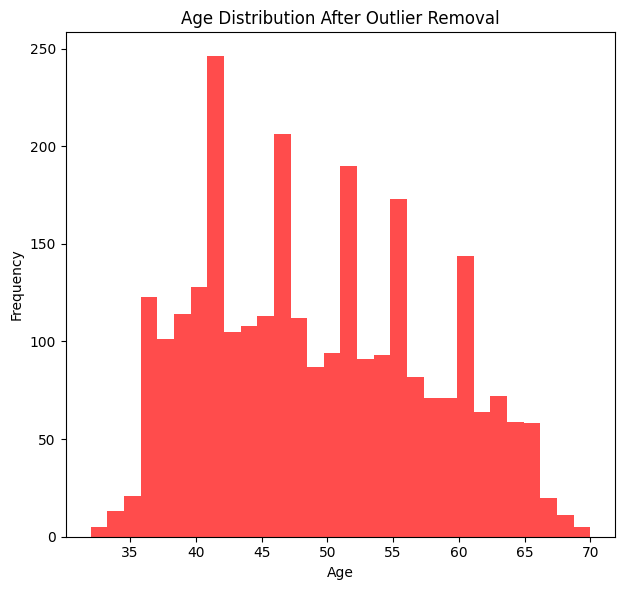

In [142]:
# Visualize age distribution after outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(df[df['outlier'] == 1]['age'], bins=30, color='red', alpha=0.7)
plt.title('Age Distribution After Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [143]:
# Check the number of outliers detected
num_outliers = df[df['outlier'] == -1].shape[0]
print("Number of outliers detected:", num_outliers)



Number of outliers detected: 147


In [156]:
# Define features and target variable
X = df.drop(columns=["TenYearCHD"])  # Features
y = df["TenYearCHD"]  # Target variable

In [157]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2927, 17)
y shape: (2927,)


In [158]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2341, 17)
y_train shape: (2341,)
X_test shape: (586, 17)
y_test shape: (586,)


In [195]:
# Define preprocessing steps for numerical and categorical features
numeric_features = ['id','age',	'education','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categorical_features = ['sex','is_smoking']

In [196]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [197]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [198]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model Evaluation

In [199]:
# Baseline accuracy
baseline_accuracy = y_test.value_counts(normalize=True)[0]
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8464163822525598


In [207]:
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the model pipeline with preprocessing, sampling, and classification
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomUnderSampler()),  # Choose the appropriate sampler
    ('classifier', BalancedRandomForestClassifier(random_state=42))
])


In [208]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [209]:
# Perform grid search with the model pipeline

# Then, you can use delayed as before

grid_search = GridSearchCV(model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/util

KeyboardInterrupt: 

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy of Random Forest Classifier with GridSearchCV:", accuracy_rf)

In [ ]:
# Classification report for Random Forest Classifier
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Logistic Regression

In [ ]:
# GridSearchCV for Logistic Regression

logistic_model = Pipeline(steps=[

    ('preprocessor', preprocessor),

    ('classifier', LogisticRegression())

])



logistic_param_grid = {
    'classifier__penalty': ['l2'],
    'classifier__C': [0.1, 1.0, 10.0]
}

In [ ]:
logistic_grid_search = GridSearchCV(logistic_model, param_grid=logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

In [ ]:
best_logistic_model = logistic_grid_search.best_estimator_
print("Best Parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Cross-validation Score for Logistic Regression:", logistic_grid_search.best_score_)

In [ ]:
y_pred_logistic = best_logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression on Test Set:", accuracy_logistic)

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# KNN

In [ ]:
# GridSearchCV for KNN Classifier

knn_model = Pipeline(steps=[

    ('preprocessor', preprocessor),

    ('classifier', KNeighborsClassifier())

])

knn_param_grid = {

    'classifier__n_neighbors': [3, 5, 7, 9, 11]

}

In [ ]:
knn_grid_search = GridSearchCV(knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy')

knn_grid_search.fit(X_train, y_train)

In [ ]:
best_knn_model = knn_grid_search.best_estimator_
print("Best Parameters for KNN Classifier:", knn_grid_search.best_params_)

print("Cross-validation Score for KNN Classifier:", knn_grid_search.best_score_)

In [ ]:
y_pred_knn = best_knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of KNN Classifier on Test Set:", accuracy_knn)

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Gradient Boosting

In [ ]:
# Define the Gradient Boosting Classifier pipeline
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [ ]:
# Define the hyperparameter grid for GridSearchCV
gb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10]
}

In [ ]:
# Perform GridSearchCV to find the best hyperparameters
gb_grid_search = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best score
best_params_gb = gb_grid_search.best_params_
best_score_gb = gb_grid_search.best_score_
print("Best Parameters for Gradient Boosting Classifier:", best_params_gb)
print("Best Score for Gradient Boosting Classifier:", best_score_gb)

In [ ]:
# Predict on the test set using the best model from GridSearchCV
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting Classifier on Test Set:", accuracy_gb)

In [ ]:
# Classification report for Gradient Boosting Classifier
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))